# Decision Trees
Here's how a decision tree works:
1. Root Node: At the beginning, you have a single node called 'the root node' that represents the entire dataset
2. Splitting: The decision tree algorithm evaluates different attributes (features) and selects the one that, when used as a decision criterion, results in the best separation of data into subsets. The process is repeated at each internal node of the tree
3. Internal Nodes: Internal nodes in the tree represent decisions or conditions based on the chosen attribute. For example, if you were building a decision tree to classify animals, an internal node might ask, 'Is it a mammal?'
4. Branches: Each branch emerging from an internal node represents one of the of the possible outcomes or values for that attribute. For instance, if the decision is based on whether an animal is a mammal, you would have two branches: 'Yes' and 'No'
5. Leaves(Terminal Nodes): the terminal nodes, often referred to as 'leaves' represent the final classification or prediction. In the animal example, the leaves might specify the animal's species or group.
6. Recursive Process: The process of splitting the data into subsets and creating new internal nodes continues recursively until cretain stopping criteria are met. These criteria might include a maximum depth for the tree, a minimum number of samples in a leaf node or other factor.
7. Predictions: To make a predictions or classification for a new data point, you traverse the tree from the root node down to a leaf node, following the path that corresponds to the values of the attributes for that data point. The class or value associated with the leaf node is the final prediction.

* Decision trees have several advantages, including simplicity and interpretability, as they closely resemble human decision-making processes. 
* However, they can be prone to overfitting when they become too complex. 
* To address this issue, techniques like pruning and using ensemble methods such as random forests are often employed. 
* Decision trees are widely used in various fields, including finance, healthcare and NLP, due to their versatility and ease of use

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#basic ds funcs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support,roc_curve

#tree stuff
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

#pycaret
from pycaret.classification import *

#visualization stuff
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [118]:
data.columns

Index(['age', 'sex', 'typ_chestpain', 'resting_bps', 'chol',
       'fasting_bloodsugar', 'resting_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'Nof_fvessel',
       'typ_thalassemia', 'target'],
      dtype='object')

In [4]:
# importing data
data = pd.read_csv('../../data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#autoviz library
AV = AutoViz_Class()
report = AV.AutoViz(
    filename='../../data/heart.csv',
    sep=',',
    depVar='',
    dfte=data,
    header=0,
    verbose=0,
    lowess=False,
    chart_format='html',
    max_rows_analyzed=15000,
    max_cols_analyzed=30
)

Shape of your Data Set loaded: (303, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    14 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No scatter plots with depVar when no depVar is given.


Saving distplots_nums in HTML format


Saving violinplots in HTML format


Saving heatmaps in HTML format


Saving cat_var_plots in HTML format
                                                                                                                       

Time to run AutoViz (in seconds) = 7


                                             |                                             | [  0%]   00:00 ->…


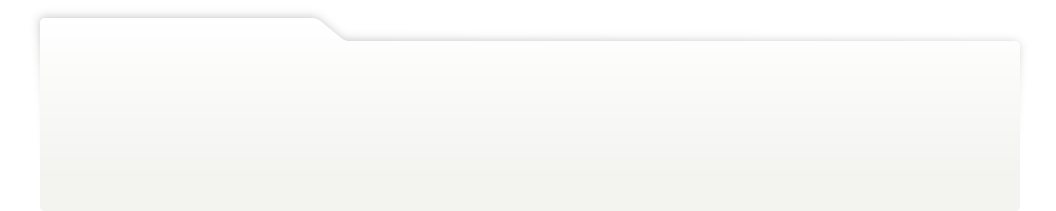
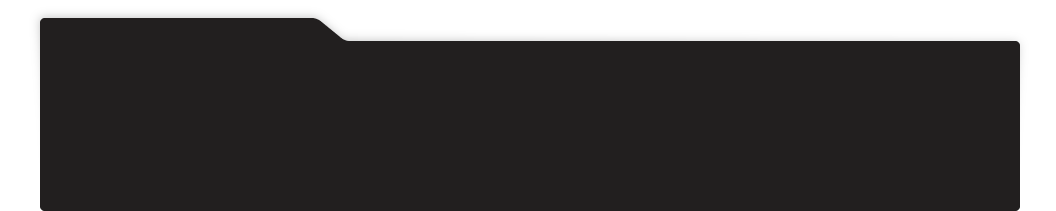
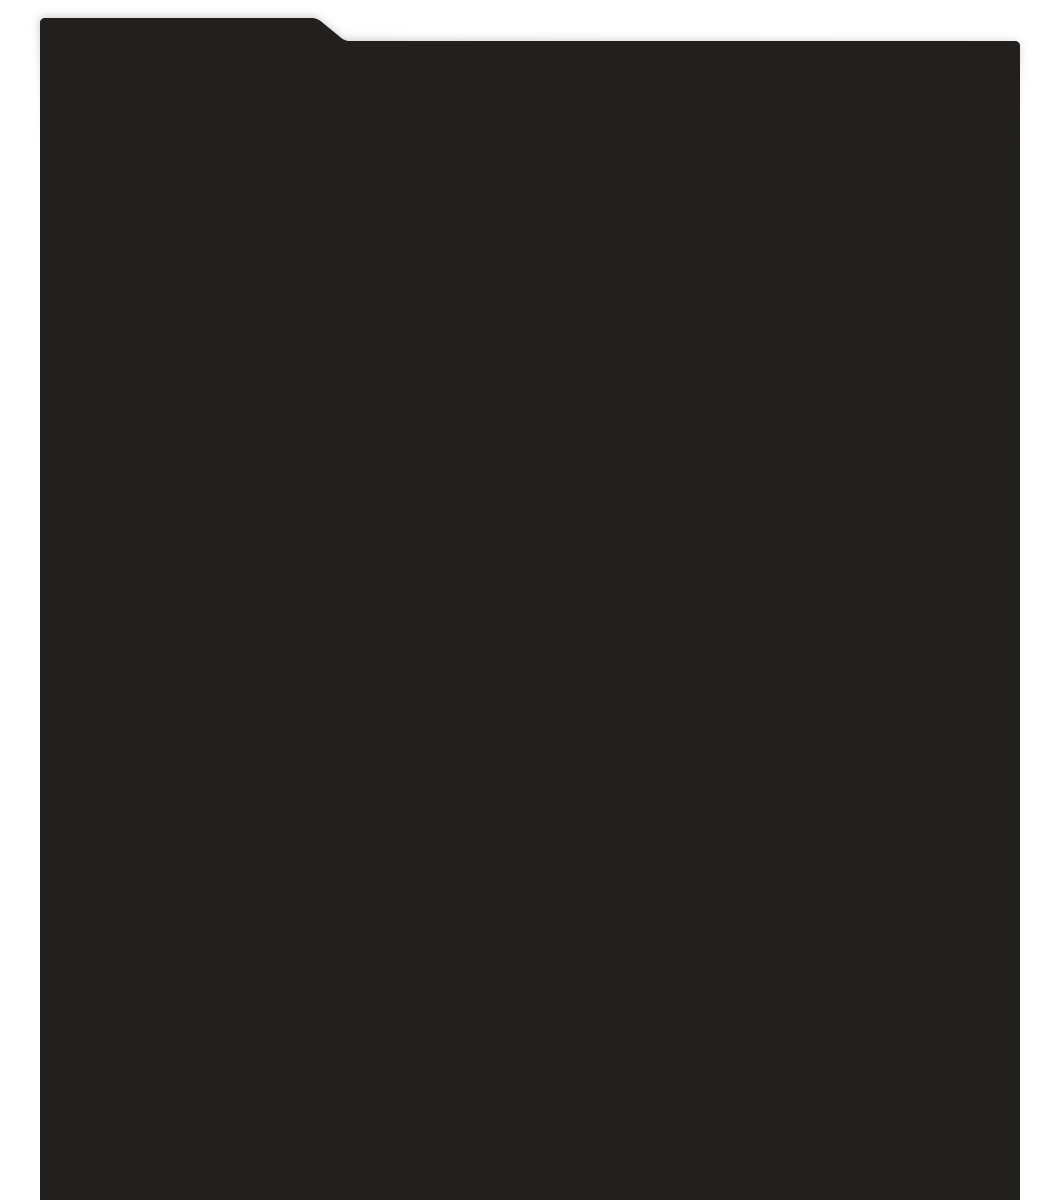
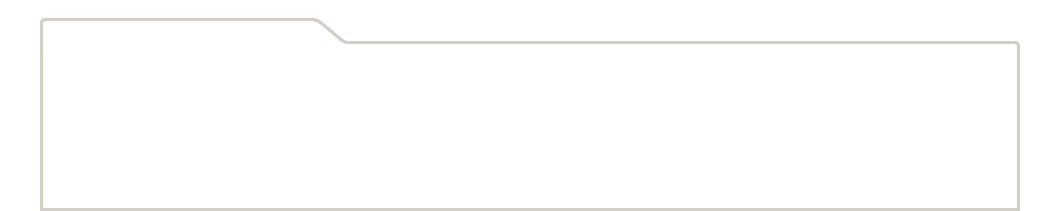
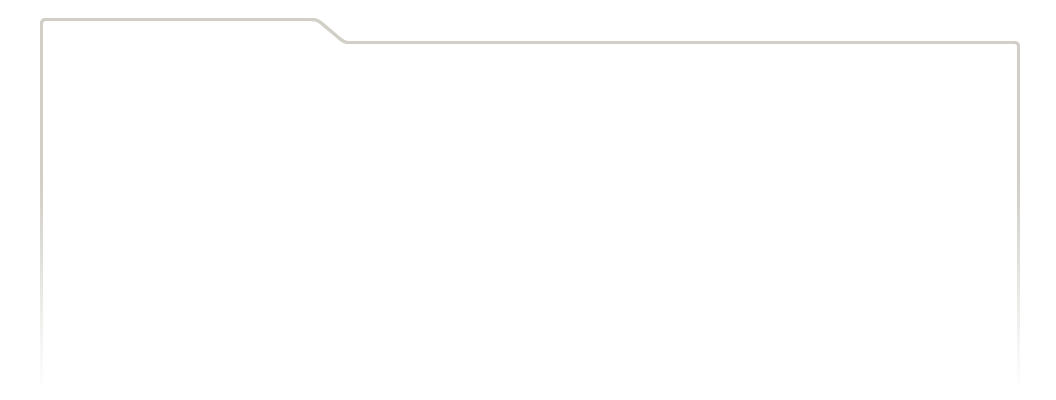
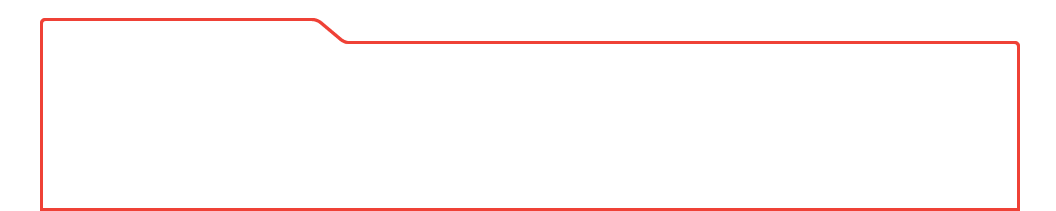
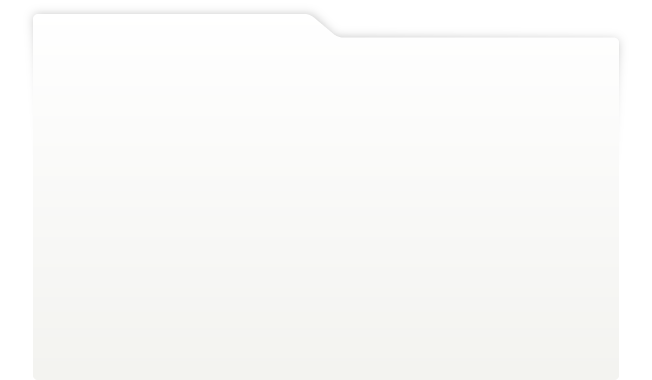
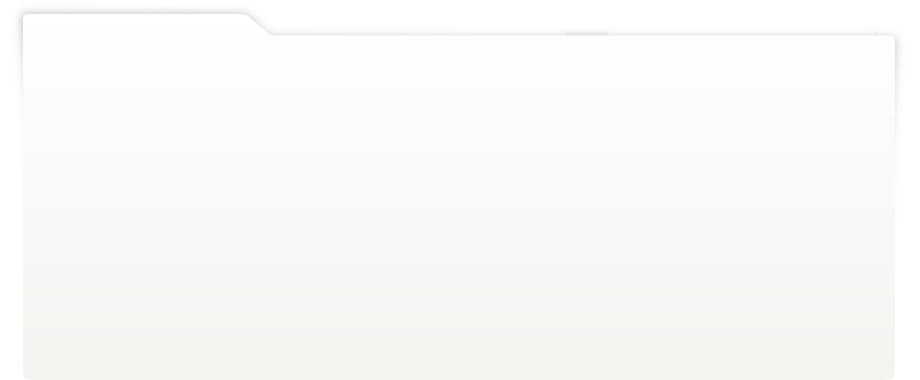
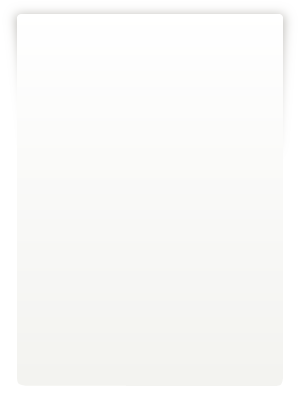
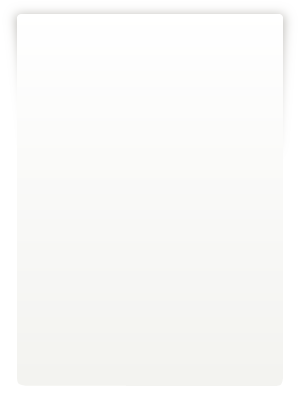
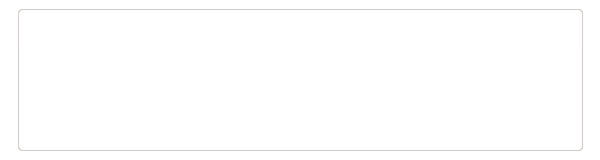
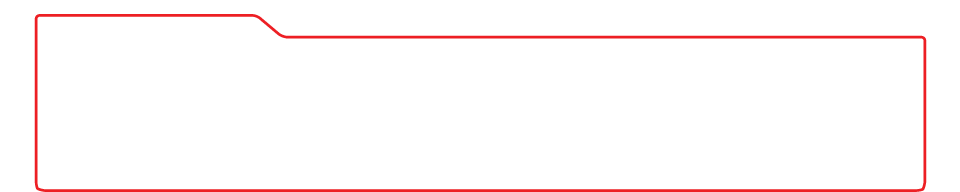
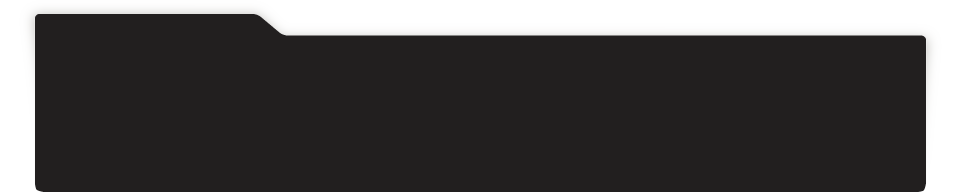
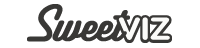
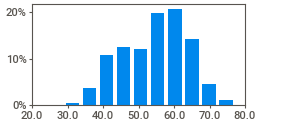
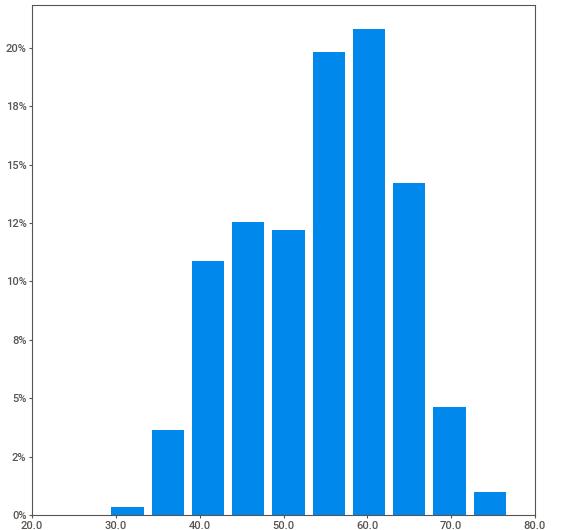
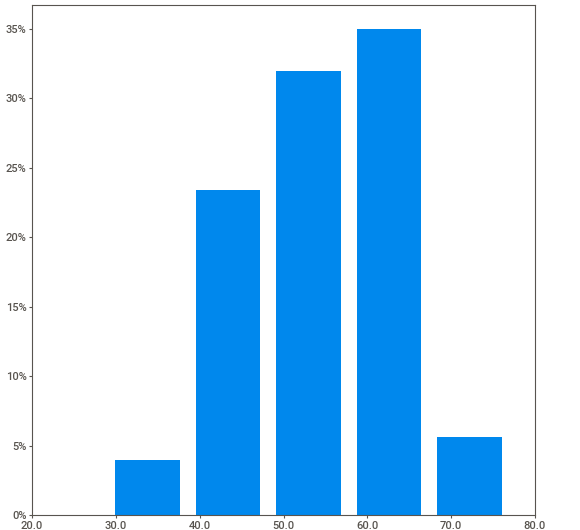
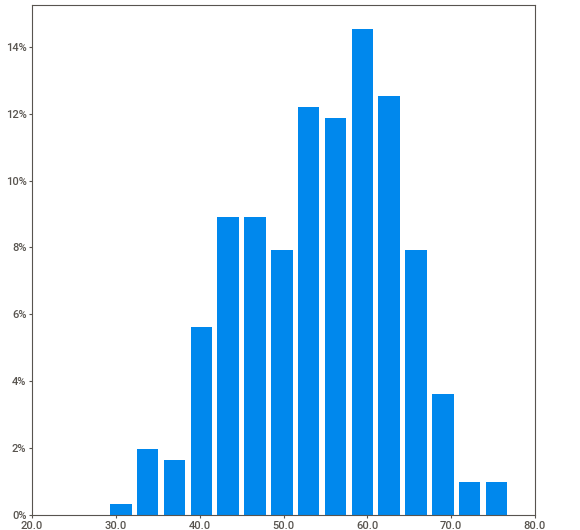
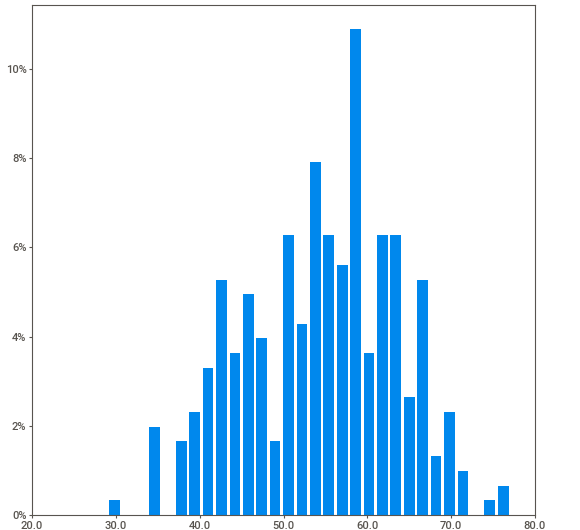
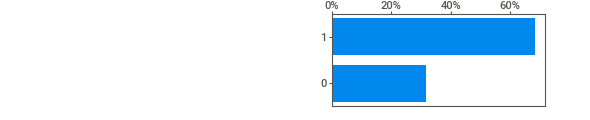
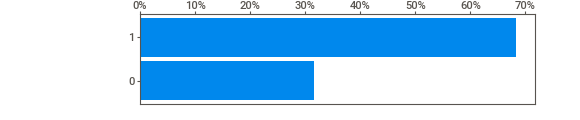
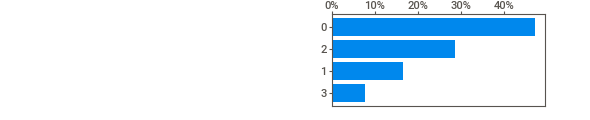
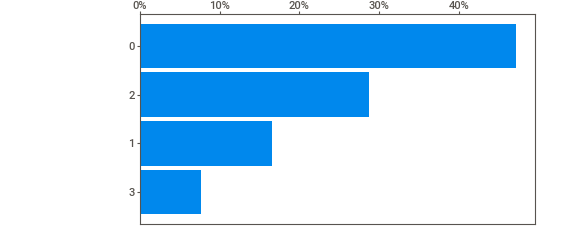
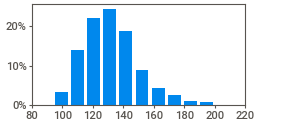
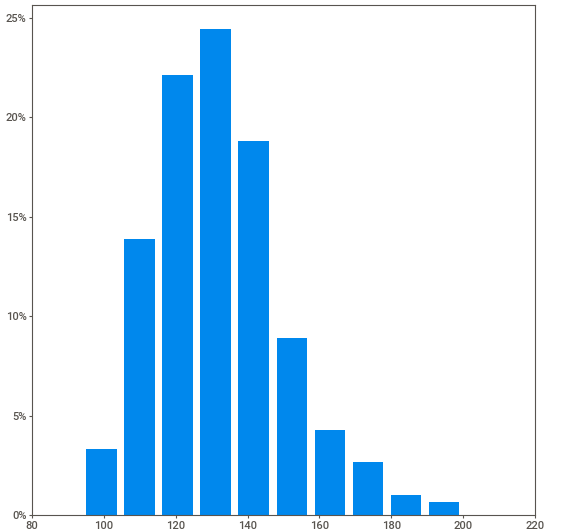
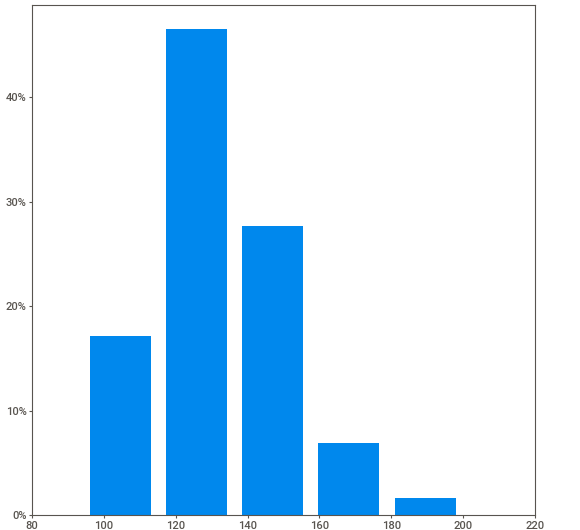
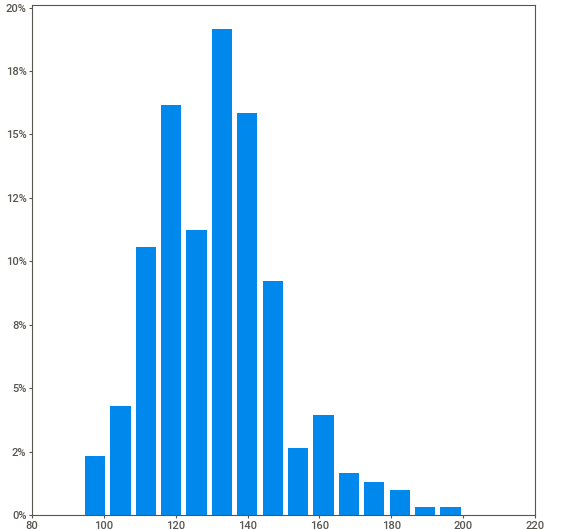
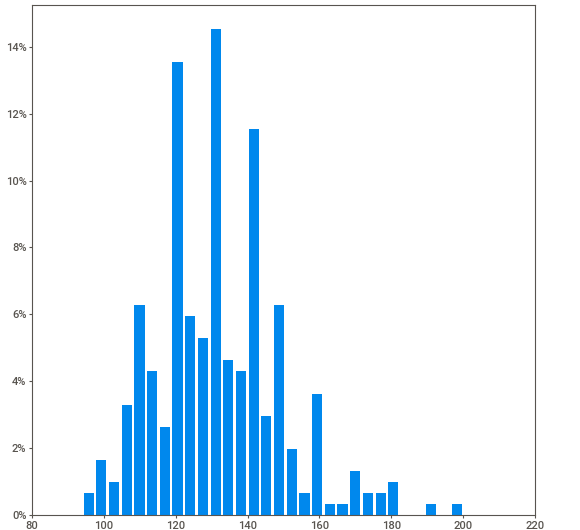
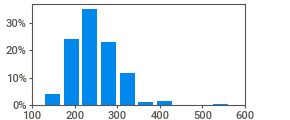
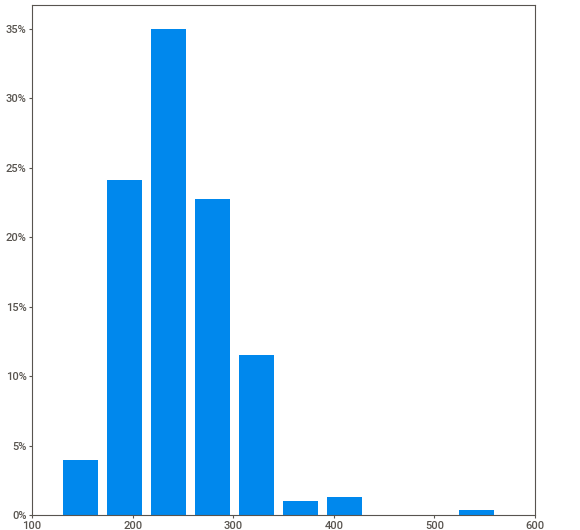
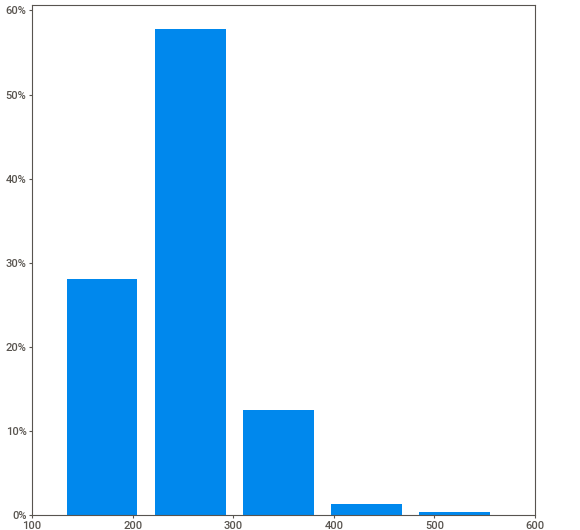
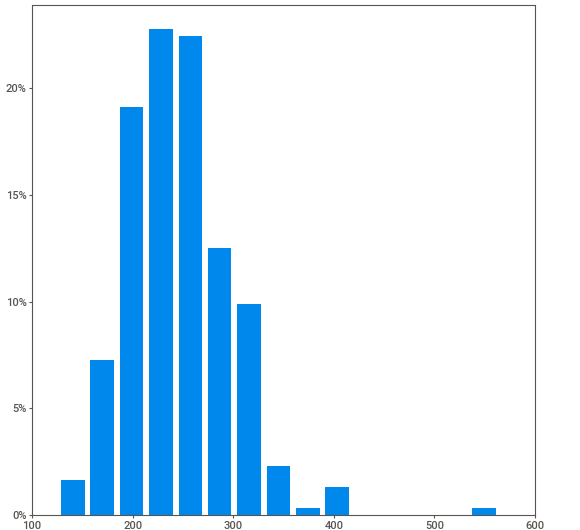
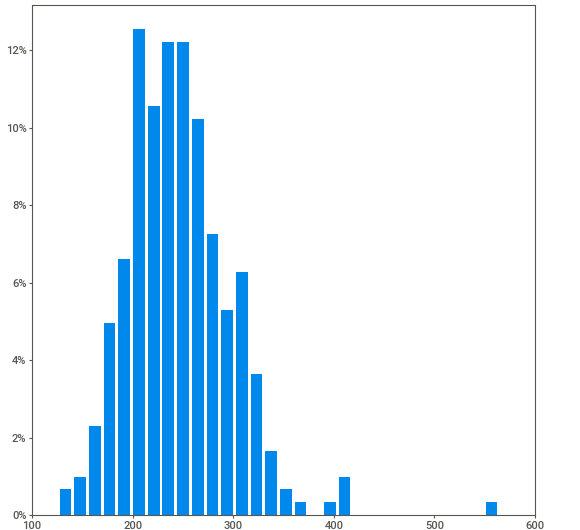
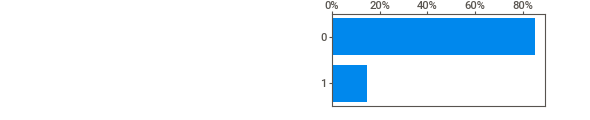
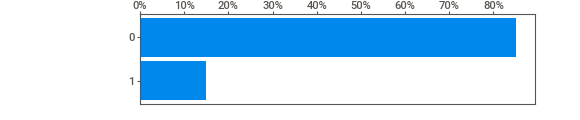
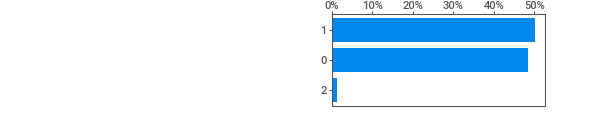
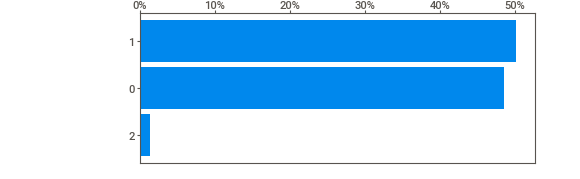
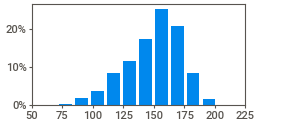
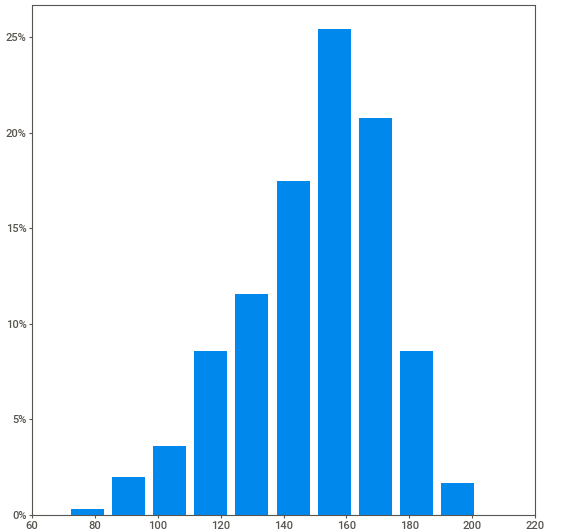
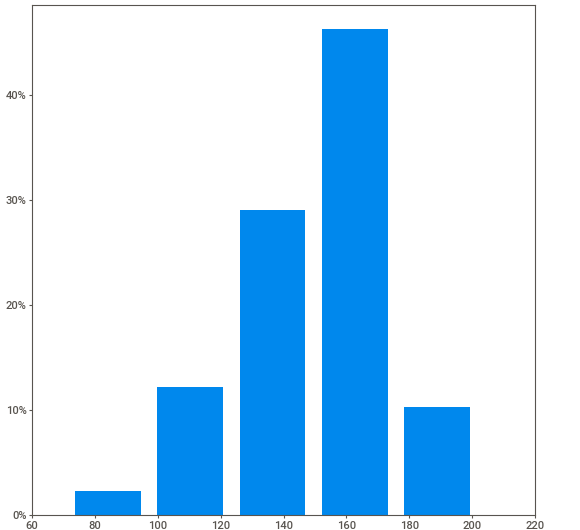
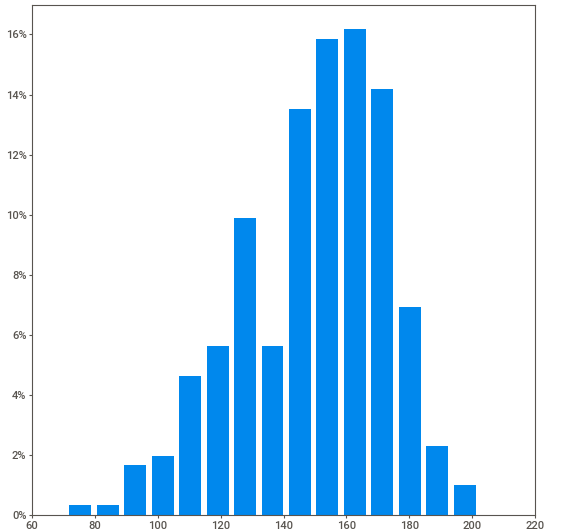
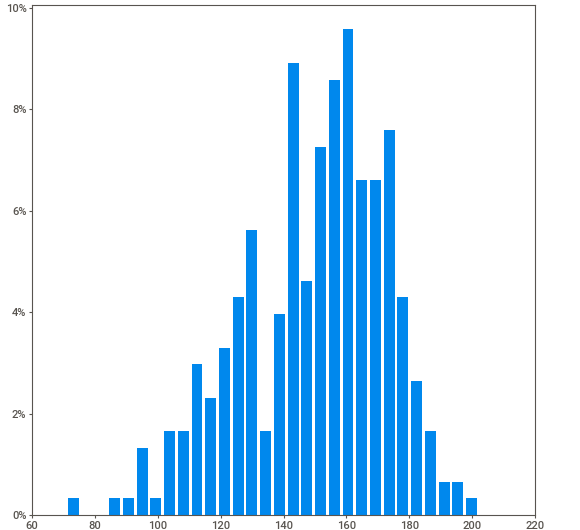
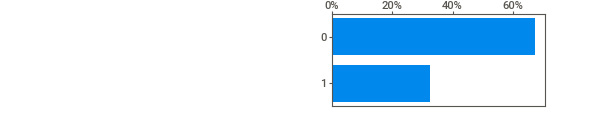
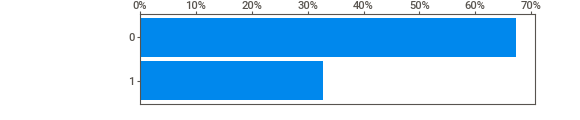
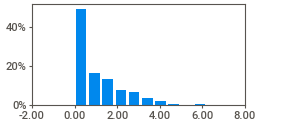
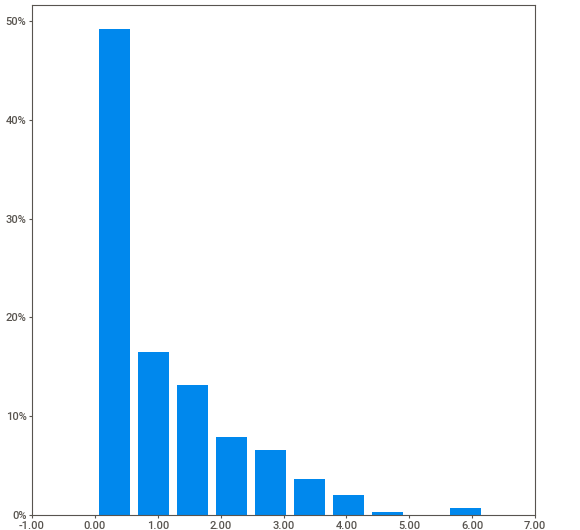
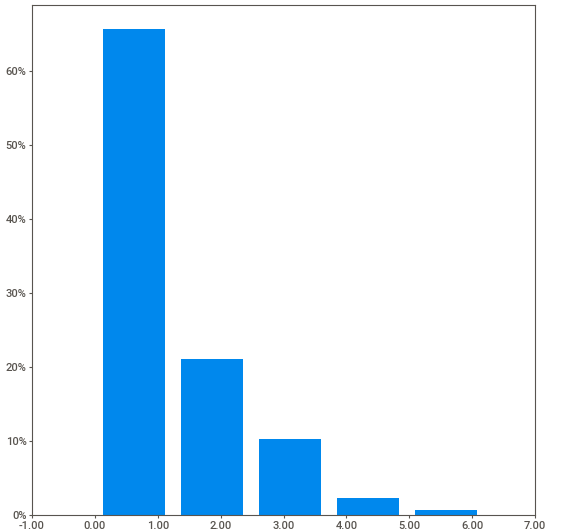
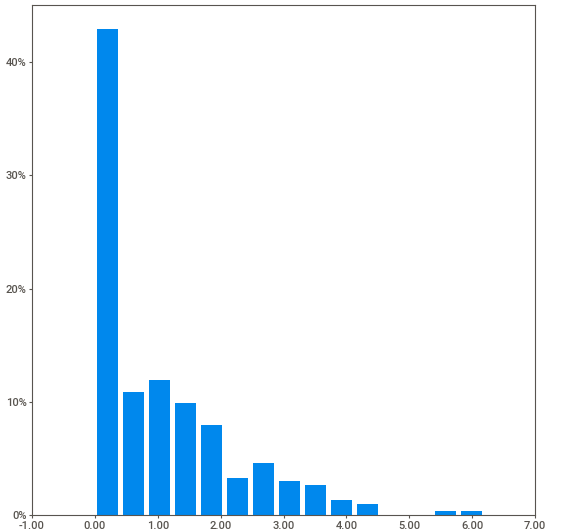
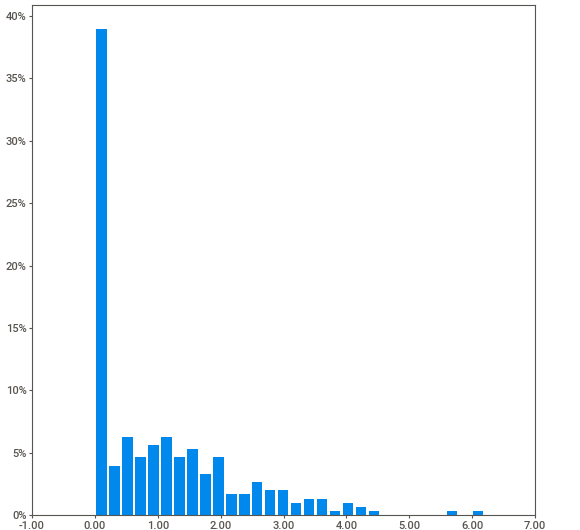
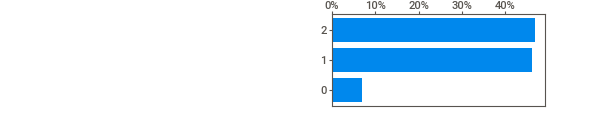
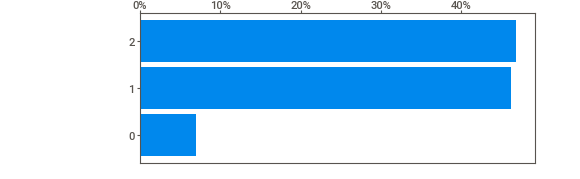
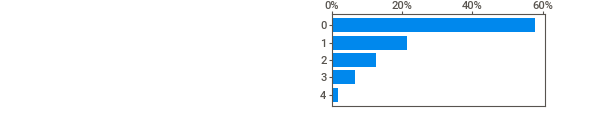
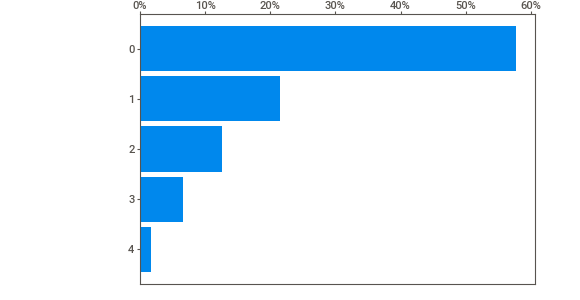
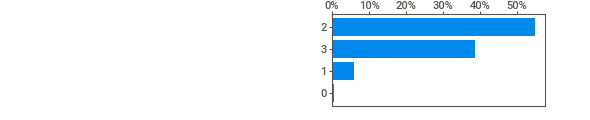
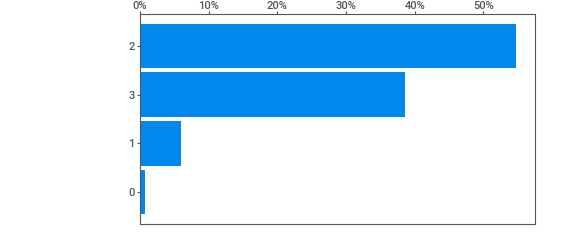
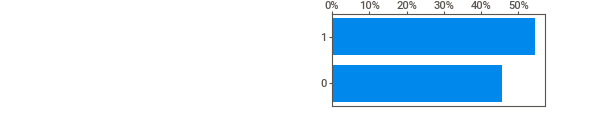
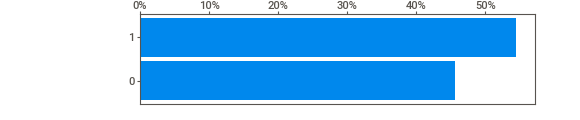
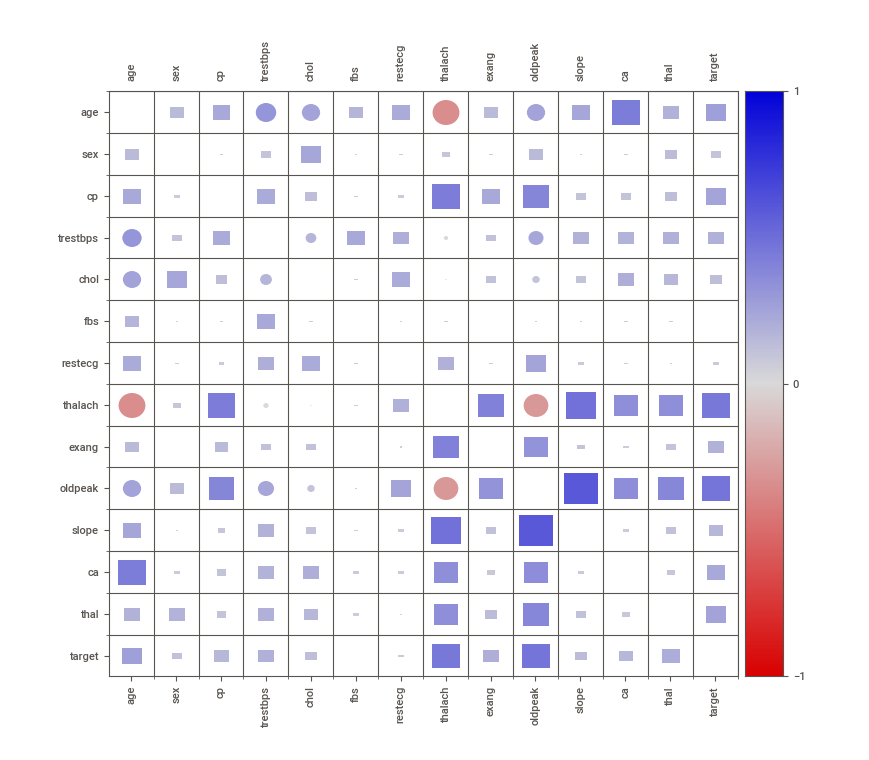
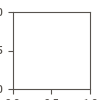

In [7]:
#sweetviz module

#generate a sweetviz report for the dataset
report = sv.analyze(data)

#display the report in jupyter
report.show_notebook()

## The data
The attributes of the data are:
* **age**: The age of the patient <br> $\in[29,77]$
* **sex**: Gender of the patient <br>   $\{0: female$, $1: male\}$.
* **cp**: Type of chest pain
    - $0$: typical angina
    - $1$: atypical angina
    - $2$: non-anginal pain
    - $3$: asymptomatic
* **trestbps**: Resting blood pressure <br>$\in[94,200]$ mm Hg
* **chol**: Serum cholesterol.<br>$\in[126,564]$ mg/dl
* **fbs**: Fasting blood sugar > 120 mg/dl<br>$\{0:False, 1:True\}$
* **restecg**: Resting electrocardiographic results
    - $0$: normal
    - $1$: having ST-T wave abnormality
    - $2$: showing probable or definite left ventricular hypertrophy 
* **thalach**: Maximum heart rate achieved <br> $\in[71,202]$
* **exang**: Exercise induced angina<br>$\{0:No, 1:Yes\}$
* **oldpeak**: ST depression induced by exercise relative to rest<br> $\in[0,6.2]$
* **slope**: Slope of the peak exercise ST segment
    - $0$: upsloping
    - $1$: flat
    - $2$: downsloping
* **ca**: Number of major vessels colored by fluoroscopy.<br> $\in\{0,1,2,3,4\}$
* **thal**: Thalassemia type<br> $\in\{0,1,2,3\}$
* **target**: Diagnosis of heart disease<br>$\{0:No, 1:Yes\}$

In [25]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [143]:
#how large is our target pool?
data.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [27]:
data.rename(columns={
    'cp':'typ_chestpain',
    'trestbps':'resting_bps',
    'fbs':'fasting_bloodsugar',
    'restecg':'resting_ecg',
    'thalach':'max_heart_rate_achieved',
    'exang':'exercise_induced_angina',
    'oldpeak':'st_depression',
    'slope':'st_slope',
    'ca':'Nof_fvessel',
    'thal':'typ_thalassemia',
},inplace=True)
data.columns

Index(['age', 'sex', 'typ_chestpain', 'resting_bps', 'chol',
       'fasting_bloodsugar', 'resting_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'Nof_fvessel',
       'typ_thalassemia', 'target'],
      dtype='object')

In [28]:
# data.isnull().sum() #none
# data[data.duplicated()] #one dupe
data.drop_duplicates(inplace=True)

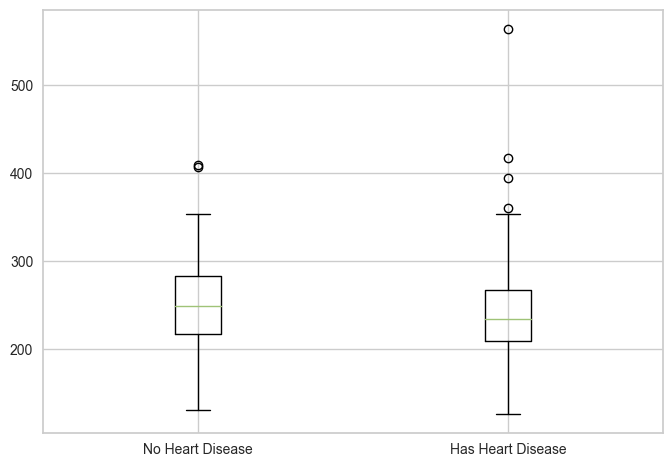

In [16]:
# plotting the box plot of serum cholesterol vs target
fig,ax = plt.subplots()
ax.boxplot(data[data.target==0].chol,positions=[0])
ax.boxplot(data[data.target==1].chol,positions=[1])
ax.set_xticks([0,1],['No Heart Disease','Has Heart Disease'])
plt.show()

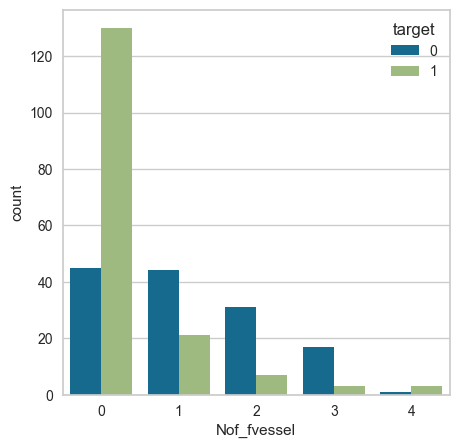

In [154]:
# plotting the bar plot of Nof_fvessel vs target count
plt.subplots(figsize=(5,5))
sns.countplot(data=data,x='Nof_fvessel',stat='count',hue='target')
plt.show()

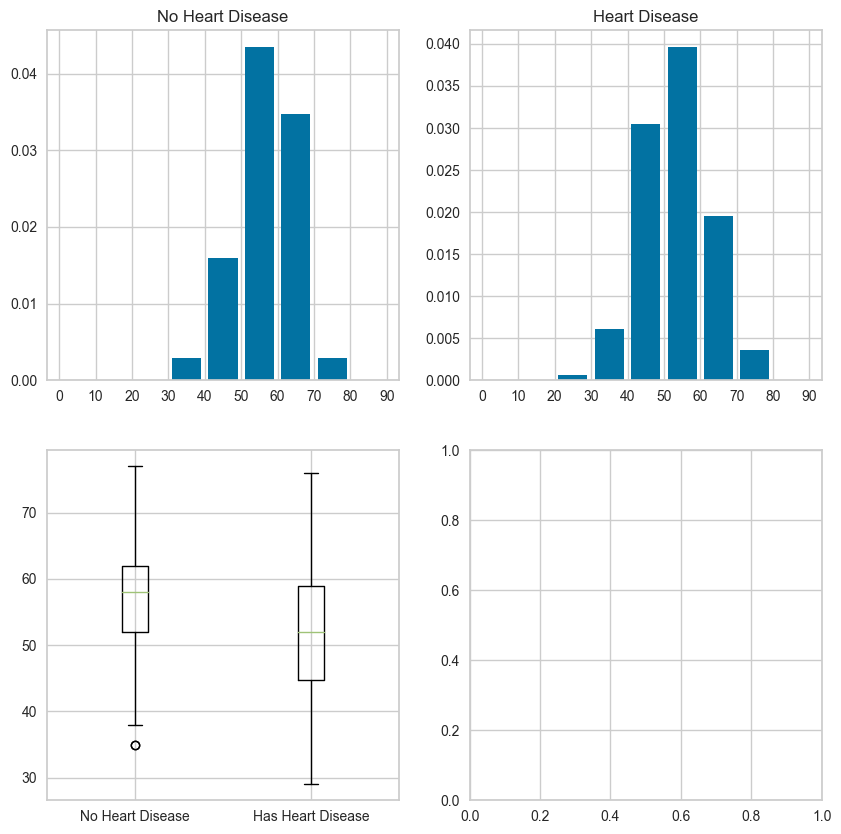

In [108]:
## age vs target
fig,axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].hist(x=data[data.target==0].age,bins=np.arange(0,100,10),rwidth=.8,density=True)
axs[0,0].set_xticks(np.arange(0,100,10))
axs[0,0].set_title('No Heart Disease')

axs[0,1].hist(x=data[data.target==1].age,bins=np.arange(0,100,10),rwidth=.8,density=True)
axs[0,1].set_xticks(np.arange(0,100,10))
axs[0,1].set_title('Heart Disease')

axs[1,0].boxplot(x=data[data.target==0].age,positions=[0])
axs[1,0].boxplot(x=data[data.target==1].age,positions=[1])
axs[1,0].set_xticks([0,1],['No Heart Disease','Has Heart Disease'])


plt.show()

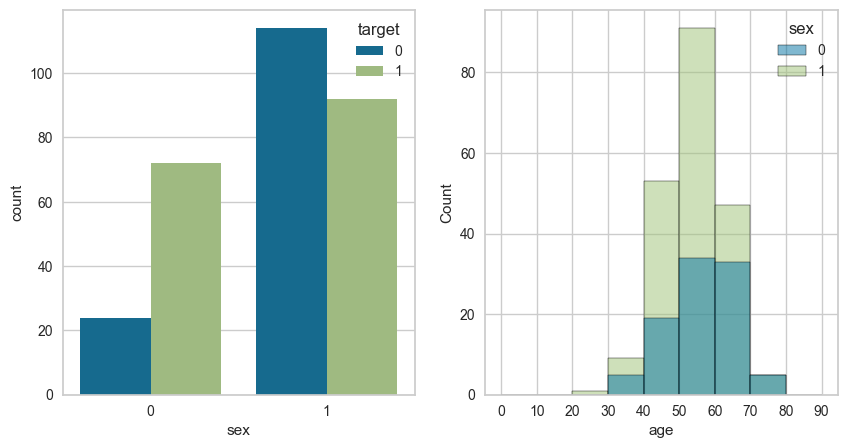

In [153]:
# sex vs target
plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=data,x='sex',hue='target')
plt.subplot(1,2,2)
g=sns.histplot(data=data,x='age',hue='sex',multiple='layer',bins=np.arange(0,100,10))
g.set_xticks(np.arange(0,100,10))
plt.show()

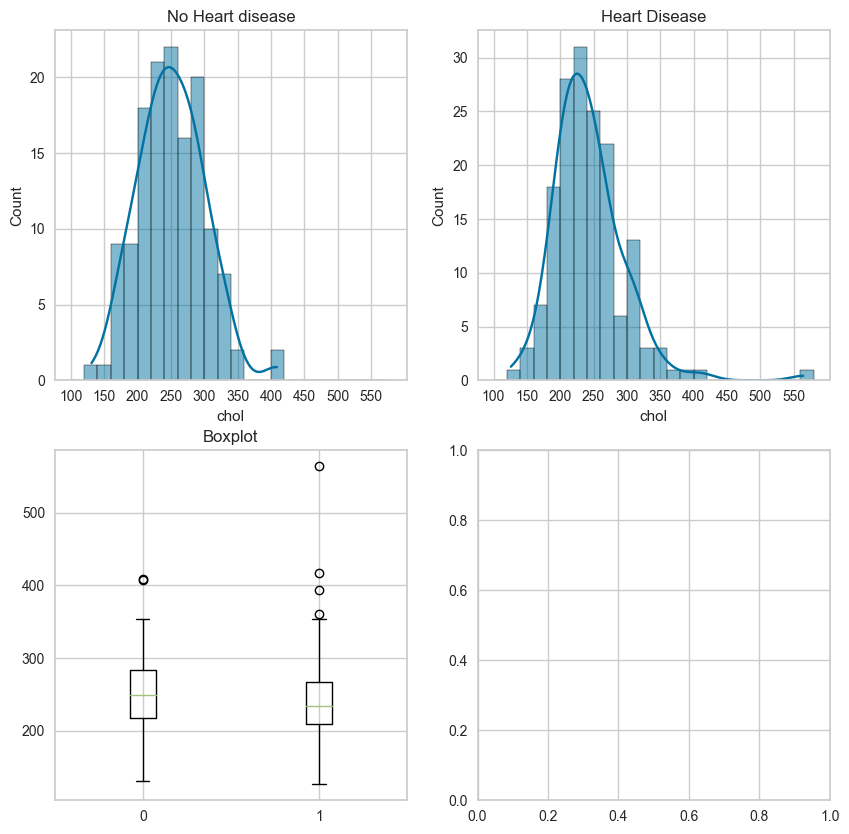

In [146]:
# chol histogram by target
plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
g = sns.histplot(data=data[data.target==0],x='chol',bins=np.arange(100,600,20),kde=True)
g.set_xticks(np.arange(100,600,50))
plt.title('No Heart disease')

plt.subplot(2,2,2)
f = sns.histplot(data=data[data.target==1],x='chol',bins=np.arange(100,600,20),kde=True)
f.set_xticks(np.arange(100,600,50))
plt.title('Heart Disease')

plt.subplot(2,2,3)
plt.boxplot(x=data[data.target==0].chol,positions=[0])
plt.boxplot(x=data[data.target==1].chol,positions=[1])
plt.title('Boxplot')

plt.show()


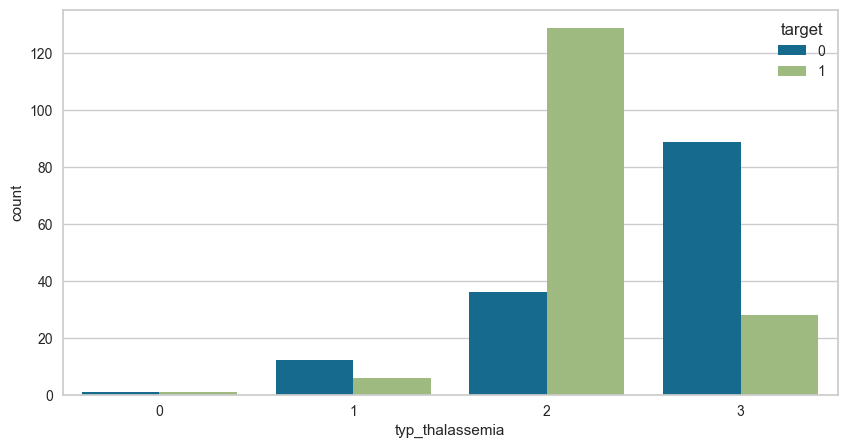

In [155]:
# type of thalassimia vs target
plt.subplots(figsize=(10,5))
sns.countplot(data=data,x='typ_thalassemia',hue='target')
plt.show()

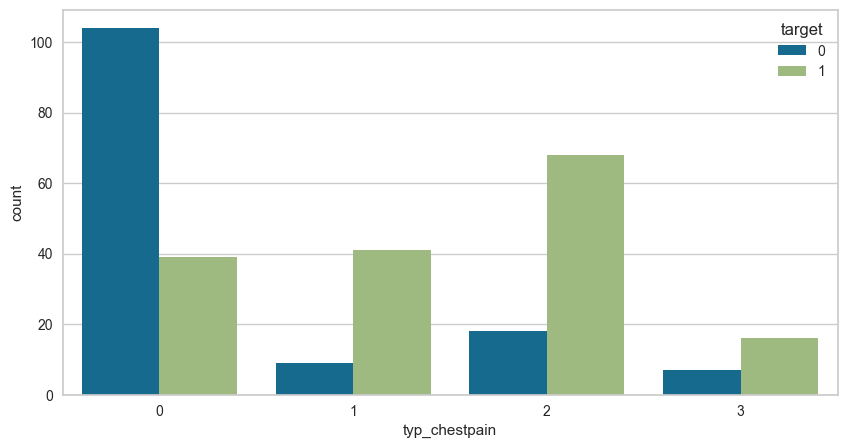

In [151]:
# type of thalassimia vs target
plt.subplots(figsize=(10,5))
sns.countplot(data=data,x='typ_chestpain',hue='target')
plt.show()

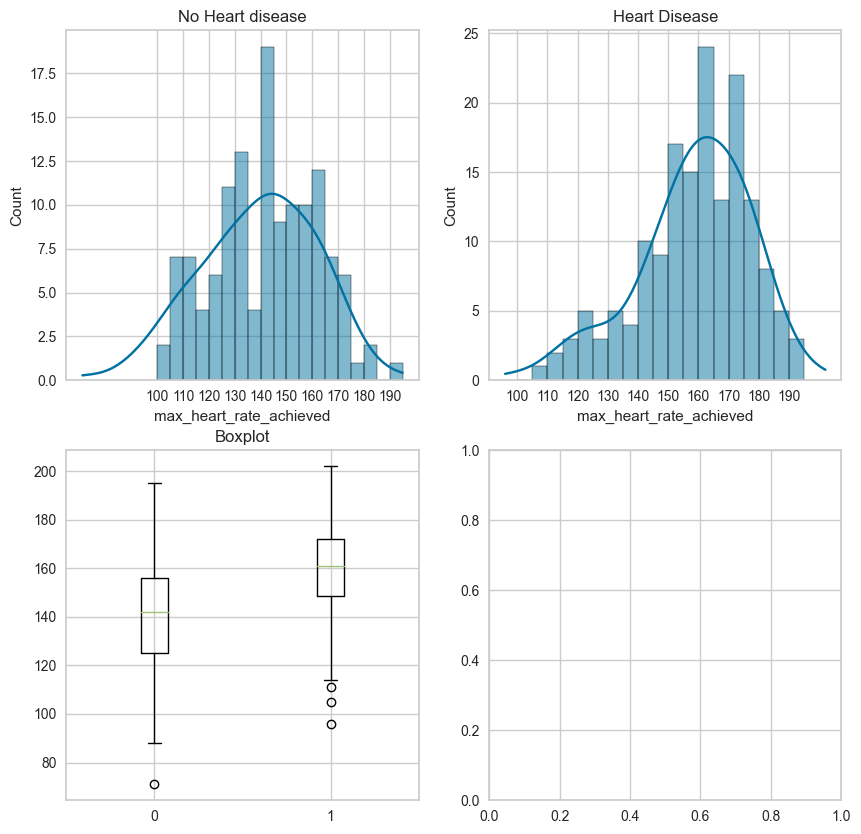

In [121]:
# max heart_rate achieved histogram by target
plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
g = sns.histplot(data=data[data.target==0],x='max_heart_rate_achieved',bins=np.arange(100,200,5),kde=True)
g.set_xticks(np.arange(100,200,10))
plt.title('No Heart disease')

plt.subplot(2,2,2)
f = sns.histplot(data=data[data.target==1],x='max_heart_rate_achieved',bins=np.arange(100,200,5),kde=True)
f.set_xticks(np.arange(100,200,10))
plt.title('Heart Disease')

plt.subplot(2,2,3)
plt.boxplot(x=data[data.target==0].max_heart_rate_achieved,positions=[0])
plt.boxplot(x=data[data.target==1].max_heart_rate_achieved,positions=[1])
plt.title('Boxplot')


plt.show()

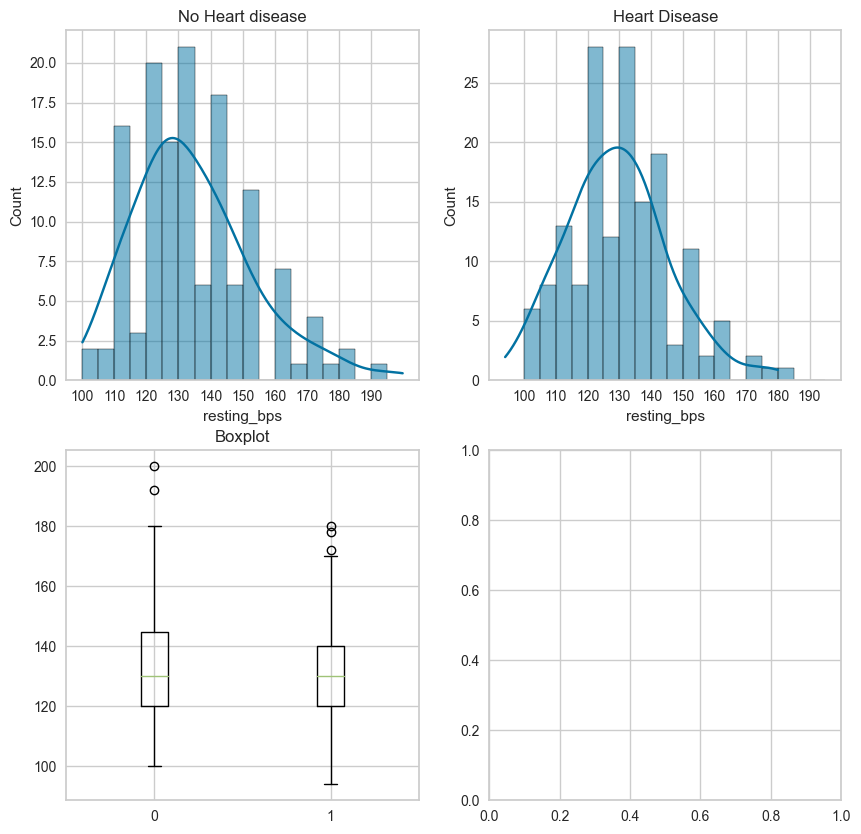

In [142]:
# resting bps histogram by target
plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
g = sns.histplot(data=data[data.target==0],x='resting_bps',bins=np.arange(100,200,5),kde=True)
g.set_xticks(np.arange(100,200,10))
plt.title('No Heart disease')

plt.subplot(2,2,2)
f = sns.histplot(data=data[data.target==1],x='resting_bps',bins=np.arange(100,200,5),kde=True)
f.set_xticks(np.arange(100,200,10))
plt.title('Heart Disease')

plt.subplot(2,2,3)
plt.boxplot(x=data[data.target==0].resting_bps,positions=[0])
plt.boxplot(x=data[data.target==1].resting_bps,positions=[1])
plt.title('Boxplot')


plt.show()

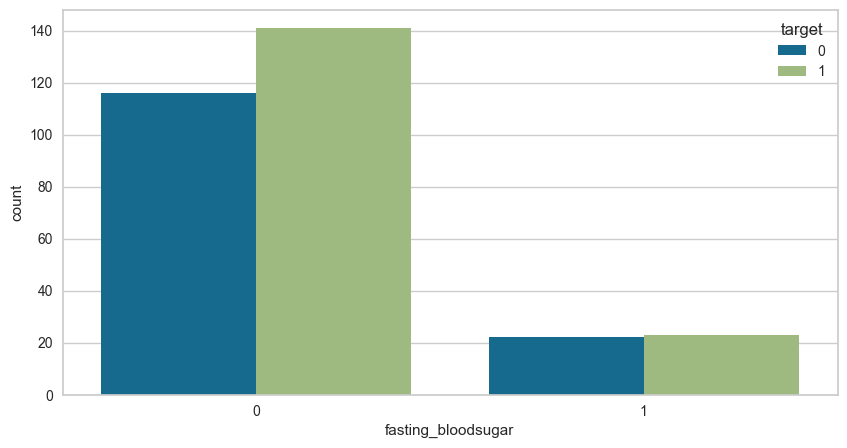

In [152]:
# fasting bloodsugar>120 mg/dl histogram by target
plt.subplots(figsize=(10,5))
sns.countplot(data=data,x='fasting_bloodsugar',hue='target')
plt.show()

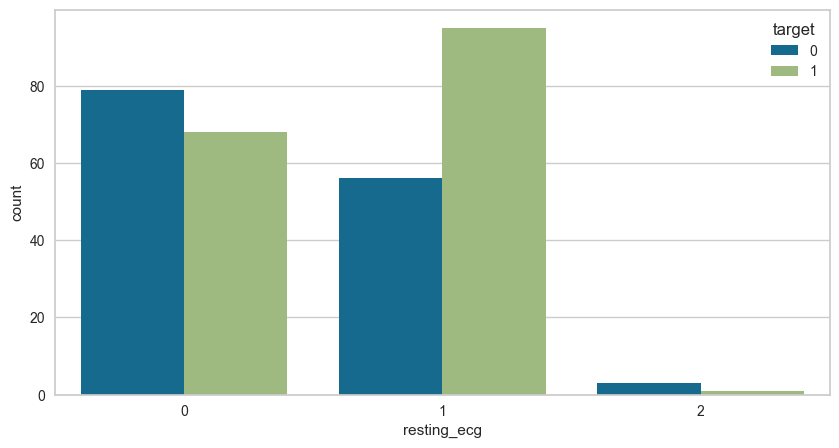

In [150]:
# resting_ecg type vs target
plt.subplots(figsize=(10,5))
sns.countplot(data=data,x='resting_ecg',hue='target')
plt.show()

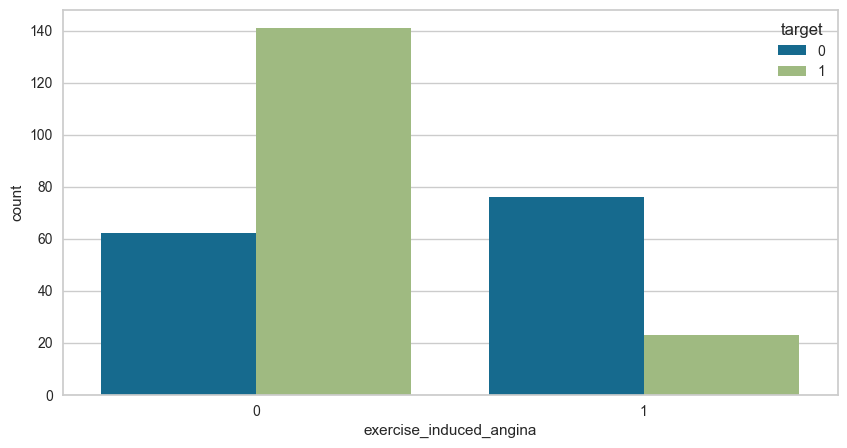

In [149]:
# exercise_induced_angina vs target
plt.subplots(figsize=(10,5))
sns.countplot(data=data,x='exercise_induced_angina',hue='target')
plt.show()

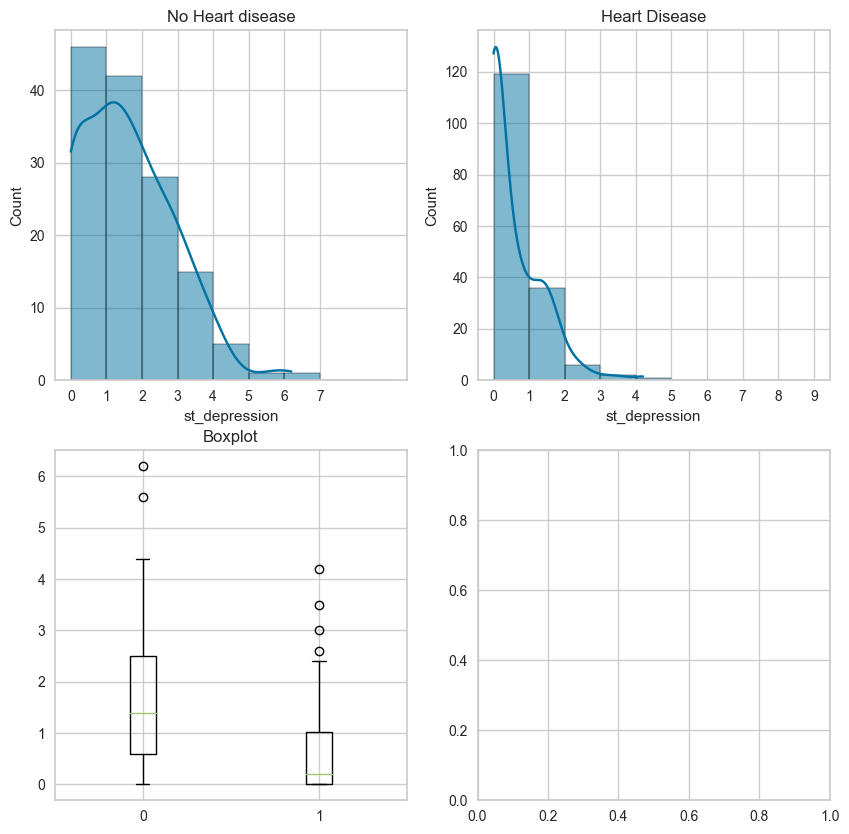

In [123]:
# st_depression histogram by target
plt.subplots(2,2,figsize=(10,10))
plt.subplot(2,2,1)
g = sns.histplot(data=data[data.target==0],x='st_depression',bins=np.arange(0,10,1),kde=True)
g.set_xticks(np.arange(0,8))
plt.title('No Heart disease')

plt.subplot(2,2,2)
f = sns.histplot(data=data[data.target==1],x='st_depression',bins=np.arange(0,10,1),kde=True)
f.set_xticks(np.arange(0,10,1))
plt.title('Heart Disease')

plt.subplot(2,2,3)
plt.boxplot(x=data[data.target==0].st_depression,positions=[0])
plt.boxplot(x=data[data.target==1].st_depression,positions=[1])
plt.title('Boxplot')


plt.show()

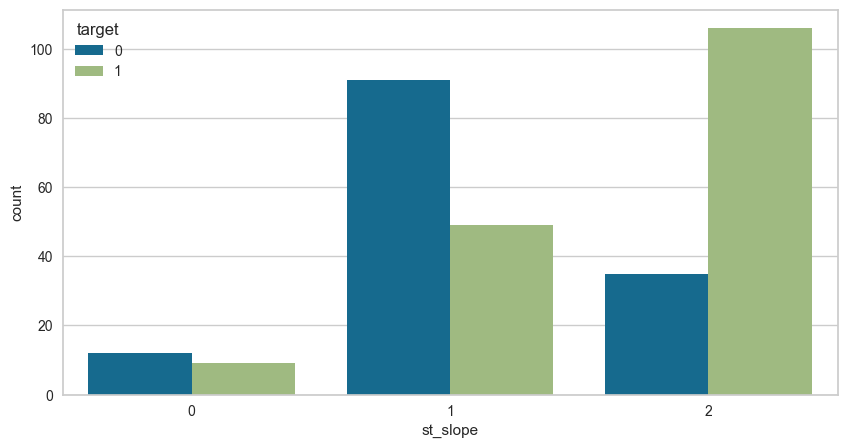

In [148]:
# exercise_induced_angina vs target
plt.subplots(figsize=(10,5))
sns.countplot(data=data,x='st_slope',hue='target')
plt.show()

# Insights from the graphs
* **typ_chestpain**: apart from type 0 (atypical angina), all other chest pains (asymptomatic as well) pose higher counts of heart disease diagnosis than otherwise
* **rest_ecg**:patients with a type 1 (ST-T wave abnormality) are at greater risk of heart disease diagnosis
* **slope**: patients with a slope of 2 are at a higher risk of heart disease
* **Nof_fvessel**: patients with no flourospectered vessels are at the highest risk of heart disease diagnosis
* **typ_thalassemia**: patients with type 2 thalassemia are noticeably more vulnerable
* **sex**: women seem marginally more susceptible to a heart disease diagnosis

<Axes: >

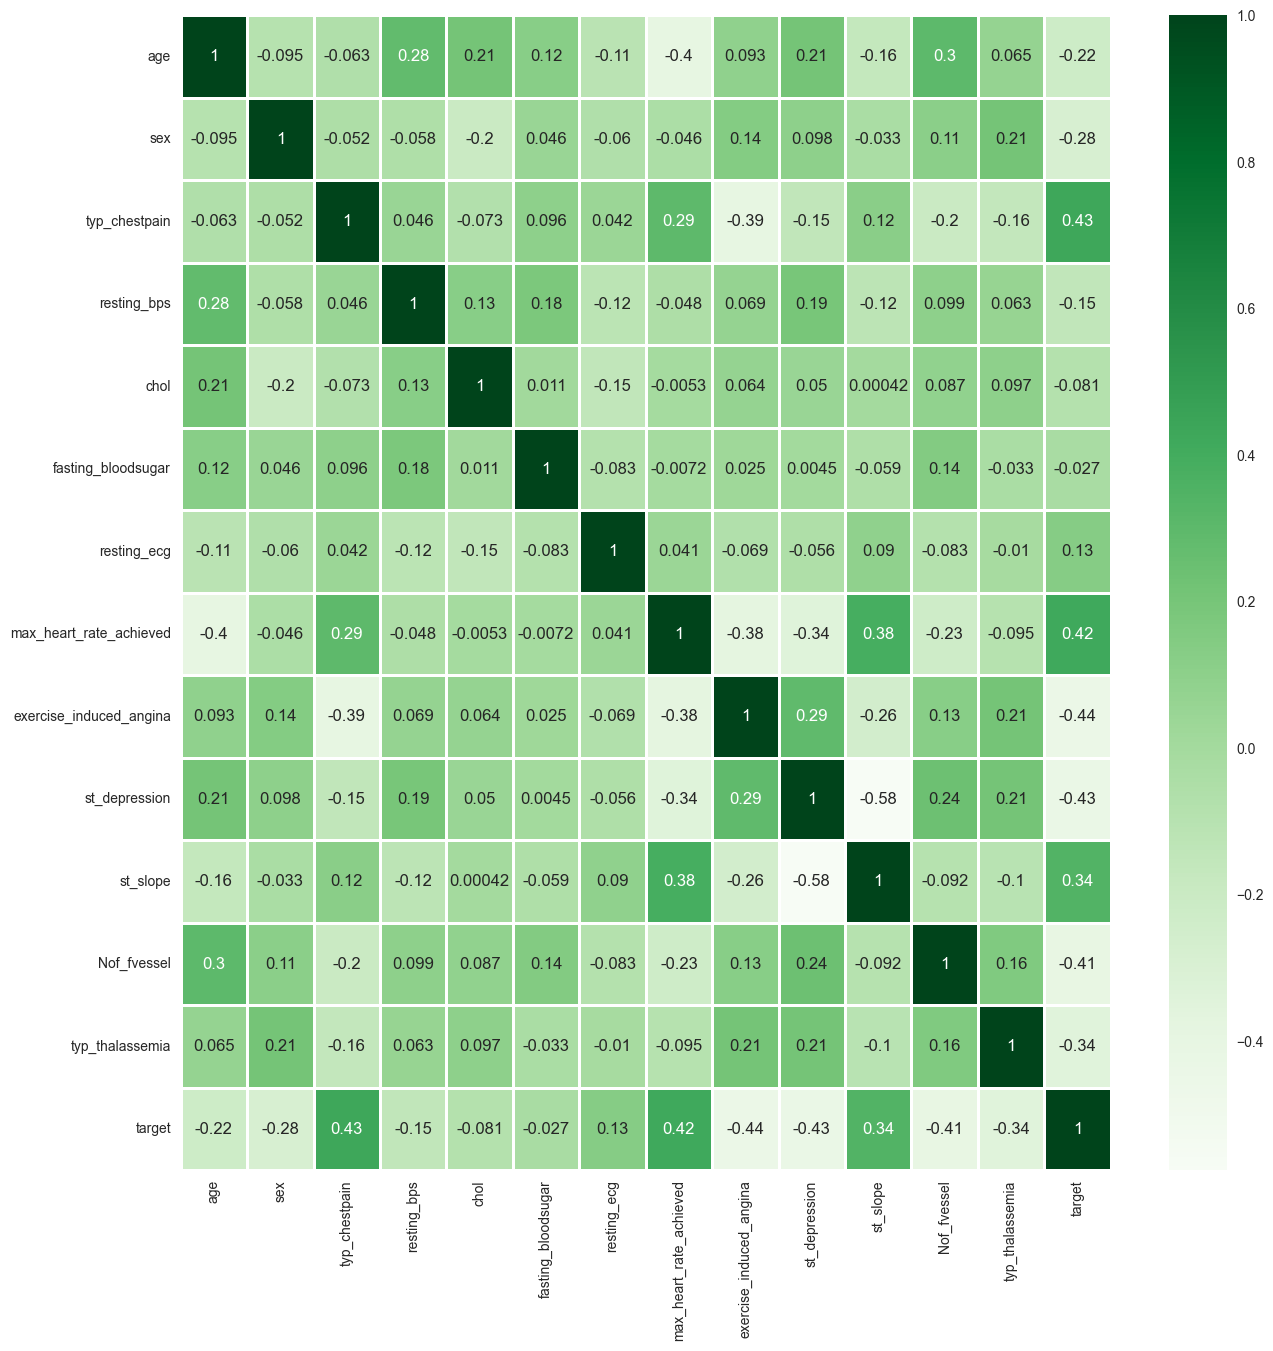

In [160]:
# the heatmap
plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),linewidth=2,annot=True,cmap='Greens')

#no features have really strong correlation

# Classification task

In [138]:
clf = setup(data, target='target')

,Description,Value
0,Session id,7618
1,Target,target
2,Target type,Binary
3,Original data shape,"(302, 14)"
4,Transformed data shape,"(302, 14)"
5,Transformed train set shape,"(211, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [139]:
best_models=compare_models() #comparing models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8483,0.9138,0.8886,0.8501,0.8662,0.6920,0.6984,0.0810
et,Extra Trees Classifier,0.8437,0.9119,0.8803,0.8542,0.8617,0.6837,0.6968,0.0830
ridge,Ridge Classifier,0.8387,0.9335,0.9136,0.8232,0.8624,0.6701,0.6841,0.0190
lda,Linear Discriminant Analysis,0.8387,0.9344,0.9136,0.8232,0.8624,0.6701,0.6841,0.0170
lr,Logistic Regression,0.8340,0.9308,0.8886,0.8314,0.8541,0.6638,0.6768,0.8920
nb,Naive Bayes,0.8247,0.9099,0.8606,0.8386,0.8442,0.6436,0.6540,0.0140
ada,Ada Boost Classifier,0.8247,0.9051,0.8530,0.8364,0.8416,0.6459,0.6521,0.0430
rf,Random Forest Classifier,0.8240,0.9131,0.8621,0.8338,0.8421,0.6449,0.6580,0.0840
qda,Quadratic Discriminant Analysis,0.8104,0.8992,0.8265,0.8429,0.8285,0.6169,0.6279,0.0130
gbc,Gradient Boosting Classifier,0.8006,0.8981,0.8273,0.8177,0.8188,0.5990,0.6049,0.0610


In [141]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6818,0.6750,0.7500,0.6923,0.7200,0.3529,0.3545
1,0.7619,0.7545,0.9091,0.7143,0.8000,0.5161,0.5394
2,0.6667,0.6591,0.8182,0.6429,0.7200,0.3226,0.3371
3,0.7143,0.7091,0.8182,0.6923,0.7500,0.4220,0.4301
4,0.7143,0.7136,0.7273,0.7273,0.7273,0.4273,0.4273
5,0.8571,0.8545,0.9091,0.8333,0.8696,0.7123,0.7156
6,0.7619,0.7639,0.7500,0.8182,0.7826,0.5205,0.5230
7,0.8571,0.8750,0.7500,1.0000,0.8571,0.7200,0.7500
8,0.6667,0.6667,0.6667,0.7273,0.6957,0.3288,0.3303
